# USING Random Forest Regression Method

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df=pd.read_csv(r'C:\Users\yesia\Downloads\archive\gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.shape

(2290, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [6]:
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [11]:
# finding correlation 

correlation = df.drop(['Date'],axis=1).corr()

<Axes: >

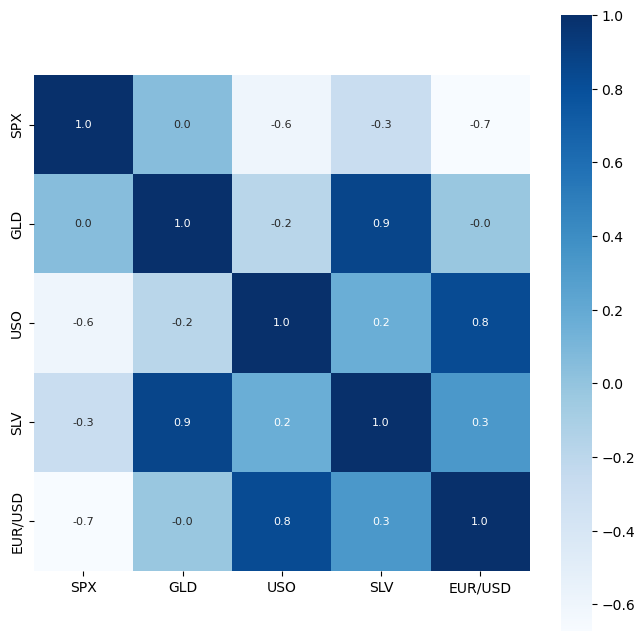

In [13]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar = True, square = True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap = 'Blues')

In [14]:
#  correlation values of GLD

print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\yesia\AppData\Local\Temp\ipykernel_8988\960008559.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

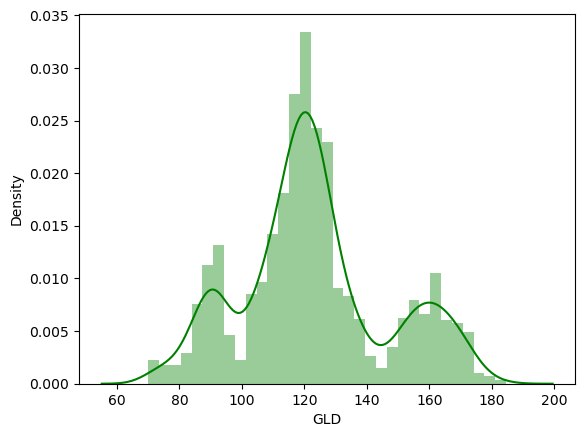

In [15]:
# checking the distribution for gold price

sns.distplot(df['GLD'],color = 'green')

In [16]:
# splitting the features and target(gld price)

X = df.drop(['Date','GLD'], axis = 1)
Y = df['GLD']

In [17]:
# performing train test split

X_train,X_test,Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=2)

In [19]:
# model training

reg = RandomForestRegressor(n_estimators = 100)

In [20]:
reg.fit(X_train, Y_train)

RandomForestRegressor()

In [21]:
# model evaluation 

test_data_prediction = reg.predict(X_test)

In [22]:
print(test_data_prediction)

[168.58479924  82.0029999  116.08320032 127.57110058 120.72460126
 154.65599838 150.182998   126.20150076 117.37969898 126.07520028
 117.03930074 171.74410107 141.8329985  168.01399853 115.1373997
 117.78280039 138.51140336 169.95880057 159.81150325 159.96189929
 155.09400063 125.09640023 175.72900038 157.14330326 125.17490042
  93.72009988  77.28839994 120.53069992 119.09449946 167.41390021
  88.17370088 125.21750025  91.19000094 117.72459984 121.15659903
 136.4837009  115.43720132 115.00880078 148.88330005 107.17820141
 104.20540236  87.24719771 126.54150048 117.89519982 154.08999987
 119.53040012 108.35479993 108.0361983   93.24660074 127.12889745
  74.99230024 113.61519987 121.54770003 111.24629898 118.93969879
 120.55559971 158.85310111 167.40930219 146.91959668  85.76339876
  94.38070036  86.93159914  90.41219997 119.08650058 126.47100052
 127.46460018 169.00590037 122.28129956 117.57839877  98.69750046
 167.61830202 143.17589914 132.03690248 121.11470211 121.53189932
 119.755200

In [23]:
# we will use rsquare metric

error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R2 score error:', error_score)

R2 score error: 0.9892272222779158


In [24]:
# compare the actual values and predicted value

Y_test = list(Y_test)

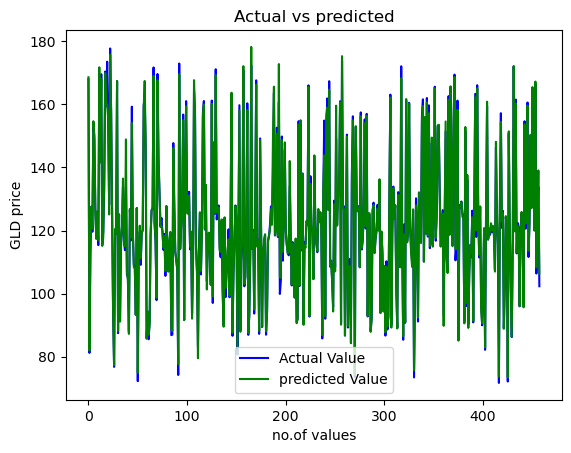

In [25]:
plt.plot(Y_test, color = 'blue', label = 'Actual Value')
plt.plot(test_data_prediction, color = 'green', label = 'predicted Value')
plt.title( 'Actual vs predicted')
plt.xlabel('no.of values')
plt.ylabel('GLD price')
plt.legend()
plt.show()